# <center> Lab 4

### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### File checking

In [3]:
path = '/Users/valerikanasha228/Downloads/gdp_csv.csv'
def check_file_path(path):
    res = True
    if not path.endswith('.csv'):
        print('ERROR: Wrong file extension (only .csv allowed)!')
        res = False
    if not os.path.exists(path):
        print('ERROR: file not found!')
        res = False
    else:
        if os.path.getsize(path) == 0:
            print('ERROR: file is empty!')
            res = False
    return res
            
def check_cell_values(data):
    res = True
    if data.isnull().values.any():
        print('ERROR: some cell values are empty!')
        res = False
    return res
is_file_correct = check_file_path(path)

### Input checking

In [4]:
def check_year(year):
    res = True
    if not year.isdigit():
        res = False
    return res

### Loading dataset

In [5]:
if not is_file_correct:
    print("ERROR: dataset can't be read")
else:
    data = pd.read_csv(path)
    is_cell_values_correct = check_cell_values(data)
    print(data.head())

  Country Name Country Code  Year         Value
0   Arab World          ARB  1968  2.576068e+10
1   Arab World          ARB  1969  2.843420e+10
2   Arab World          ARB  1970  3.138550e+10
3   Arab World          ARB  1971  3.642691e+10
4   Arab World          ARB  1972  4.331606e+10


## Linear Regression

Enter year to predict GDP: 2021
Enter country code: ARB


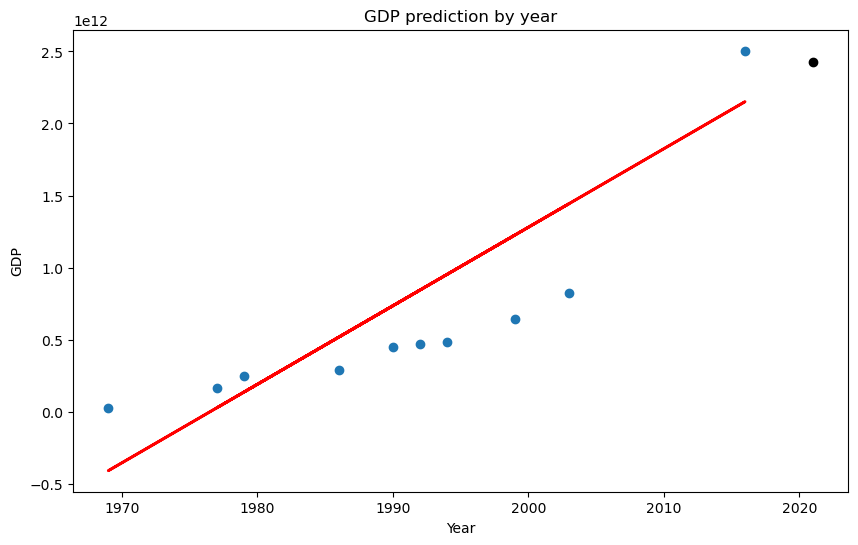

GDP prediction for 2021 in ARB: 2423706142729.922


In [10]:
if not is_file_correct or not is_cell_values_correct:
    print("ERROR: linear regression can't be made")
else:
    year = input('Enter year to predict GDP: ')
    country_code = input('Enter country code: ')
    if not check_year(year):
        print("ERROR: year must be an integer!")
    if country_code not in data['Country Code'].values:
        print("ERROR: no such country code in file")
    else:
        year = int(year)
        filtered_data = data[data['Country Code'] == country_code]
        X = filtered_data[['Year']]
        y = filtered_data['Value']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = LinearRegression()
        model.fit(X_train, y_train)
        input_data = pd.DataFrame({'Year': [year]})
        predicted_gdp = model.predict(input_data)
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test, y_test)
        plt.scatter(year, predicted_gdp, color='black')
        plt.plot(X_test, model.predict(X_test), color='red', linewidth=2)
        plt.xlabel('Year')
        plt.ylabel('GDP')
        plt.title('GDP prediction by year')
        plt.show()
        print(f'GDP prediction for {year} in {country_code}: {predicted_gdp[0]}')